## Двухслойная нейронная сеть на numpy

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


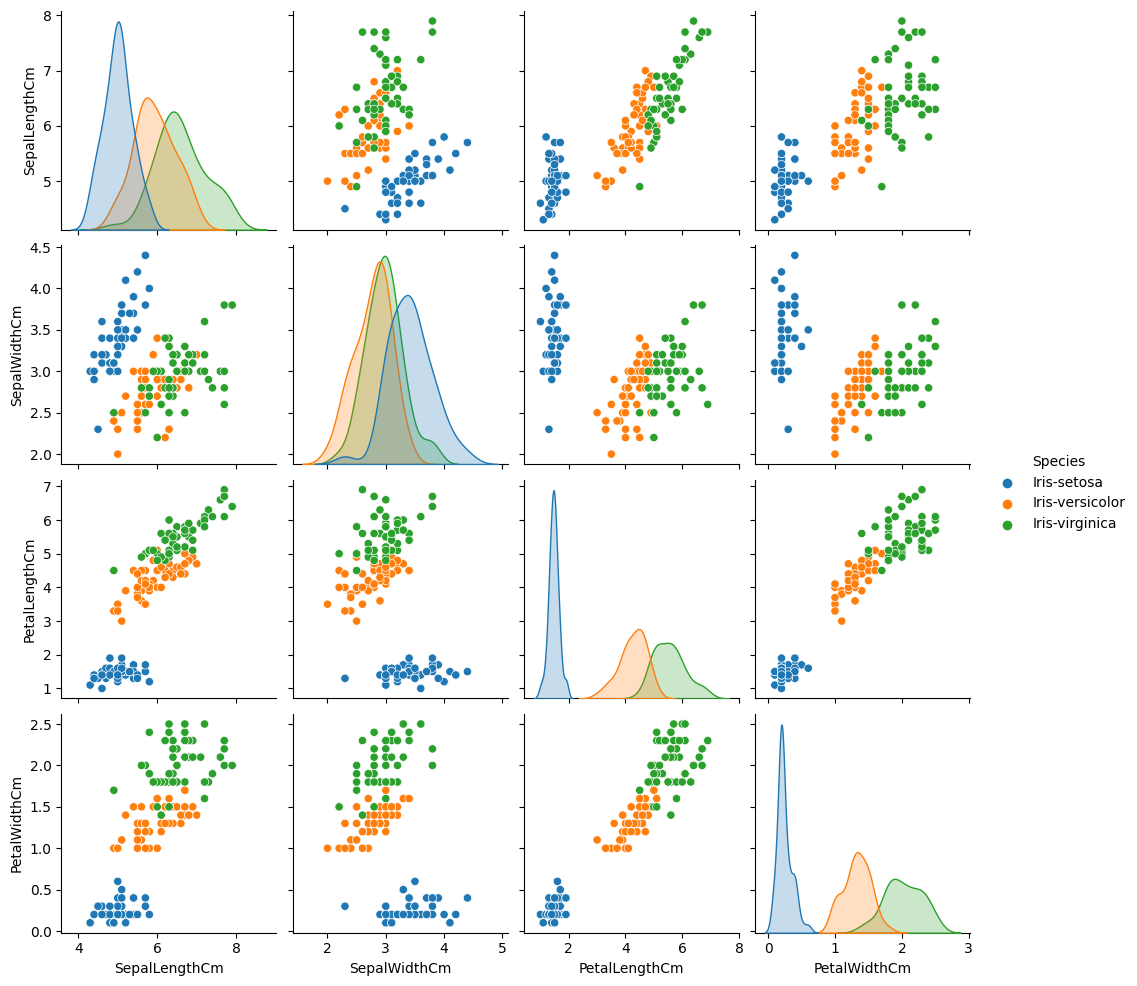

In [1]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   


Оценим работу модели с одним скрытым слоем, с количеством нейронов - 5, количество эрох обучения - 10000

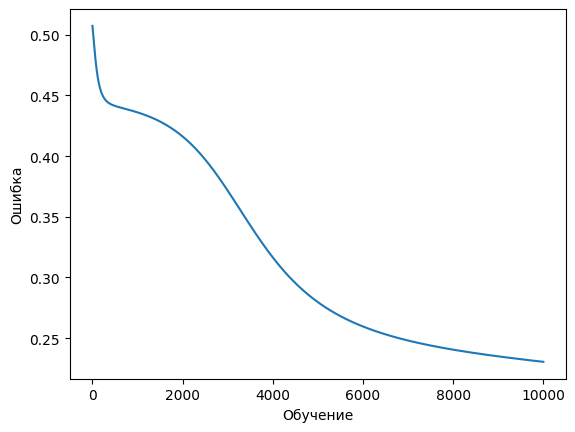

Точность нейронной сети 76.95%
CPU times: total: 3.17 s
Wall time: 4.31 s


In [2]:
%%time
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов

#количество нейронов в скрытом слое
neuron_numb = 5
epoch_cnt = 10000

w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(epoch_cnt): 

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Попробуем увеличить количество нейронов скрытого слоя до 15.

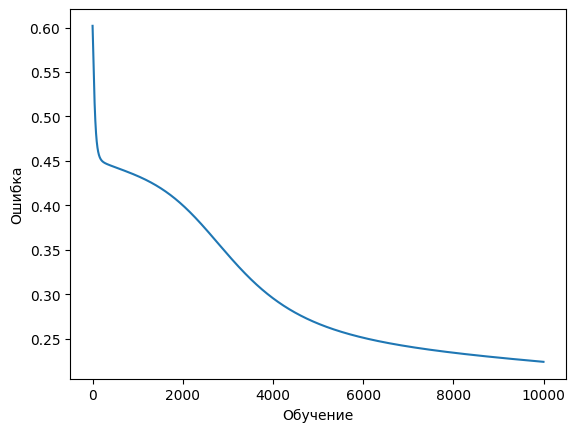

Точность нейронной сети 77.62%
CPU times: total: 4.22 s
Wall time: 5.41 s


In [3]:
%%time
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов

#количество нейронов в скрытом слое
neuron_numb = 15
epoch_cnt = 10000

w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(epoch_cnt): 

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

* Метрика модели улучшилась с 76.95% до 77.62%.
* Продолжительность обучения увеличилось с 4.31 s до 5.41 s.
* Попробуем увеличить количество нейронов скрытого слоя до 25.

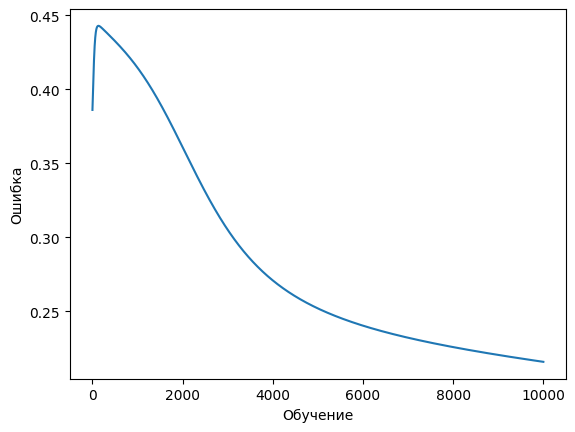

Точность нейронной сети 78.4%
CPU times: total: 5 s
Wall time: 5.51 s


In [4]:
%%time
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов

#количество нейронов в скрытом слое
neuron_numb = 25
epoch_cnt = 10000

w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(epoch_cnt): 

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

* Метрика модели выросла с 77.62% до 78.4%.
* Продолжительность обучения увеличилось с 5.41 s до 5.51 s.
* Стоит отметить, что большее значение нейронов позволяет со старта получать мешьшее значение ошибки и сводить ее к минимуму за меньшее число эпох.
* Попробуем добавить ещё один скрытый слой (всего 2). Уменьшим количества нейронов в обоих слоях до 8.

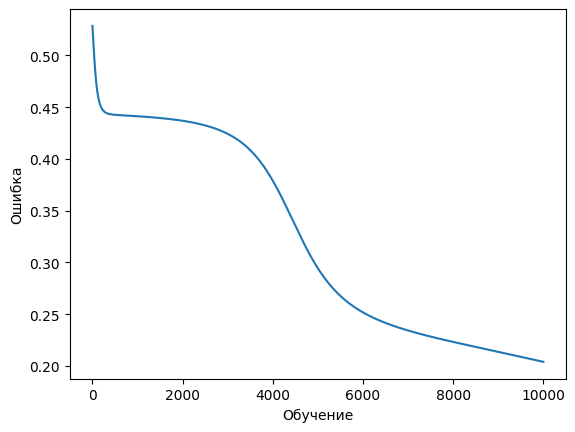

Точность нейронной сети 79.61%
CPU times: total: 5.22 s
Wall time: 5.66 s


In [5]:
%%time
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов

#количество нейронов в скрытом слое
neuron_numb = 8
epoch_cnt = 10000

w0 = 2*np.random.random((4, neuron_numb)) - 1 # входной слой
w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # скрытый слой
w2 = 2*np.random.random((neuron_numb, 3)) - 1 # выходной слой

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(epoch_cnt): 

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)   
    
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

* Метрика медели улучшилась с 78.4% до 79.61%.
* Время обучения увеличилось с 5.51 s до 5.66 s.
* Темп снижения значения ошибки преобрёл ступенчатый вид.
* Попробуем увеличить количество нейронов в обоих слоях до 25.

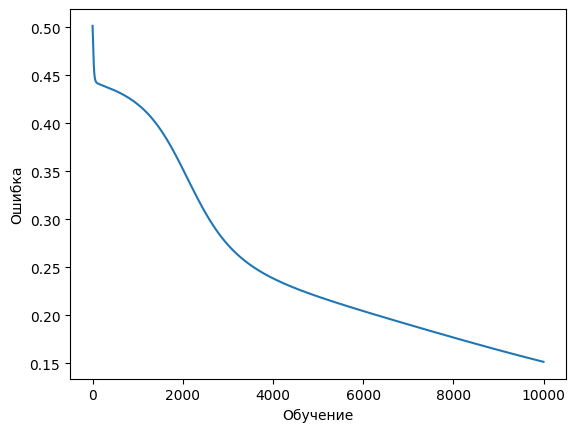

Точность нейронной сети 84.86%
CPU times: total: 8.56 s
Wall time: 9.3 s


In [6]:
%%time
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов

#количество нейронов в скрытом слое
neuron_numb = 25
epoch_cnt = 10000

w0 = 2*np.random.random((4, neuron_numb)) - 1 # входной слой
w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # скрытый слой
w2 = 2*np.random.random((neuron_numb, 3)) - 1 # выходной слой

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(epoch_cnt): 

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)   
    
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

* Метрика медели улучшилась с 79.61% до 84.86%.
* Время обучения увеличилось с 5.66 s до 9.3 s.
* Модель уменьшает значение ошибки за меньшее число итераций.
* Добавим ещё один скрытый слой (всего 3). Количество нейронов, эпох обучения и скорость обучения оставим без изменения.

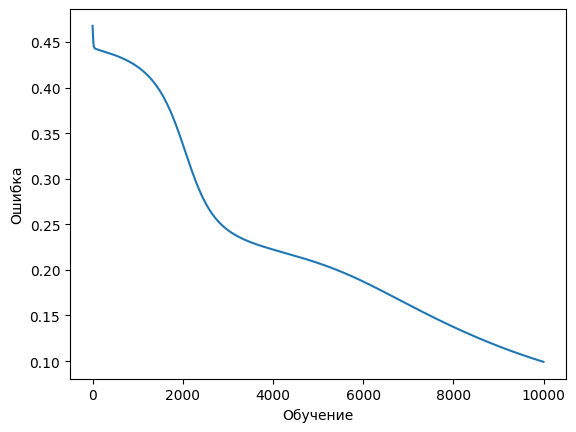

Точность нейронной сети 90.08%
CPU times: total: 12.6 s
Wall time: 14.1 s


In [7]:
%%time
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов

#количество нейронов в скрытом слое
neuron_numb = 25
epoch_cnt = 10000

w0 = 2*np.random.random((4, neuron_numb)) - 1 # входной слой
w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # скрытый слой
w2 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # скрытый слой
w3 = 2*np.random.random((neuron_numb, 3)) - 1 # выходной слой

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(epoch_cnt): 

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))
    layer4 = sigmoid(np.dot(layer3, w3))

    # обратное распространение(back propagation) с использованием градиентного спуска 
    layer4_error = y_train - layer4
    layer4_delta = layer4_error * sigmoid_deriv(layer4)
    
    layer3_error = layer4_delta.dot(w3.T)
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)   
    
    w3 += layer3.T.dot(layer4_delta) * n
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer4_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

* Метрика медели улучшилась с 84.86% до 90.08%.
* Время обучения увеличилось с 9.3 s до 14.1 s.
* Модель уменьшает значение ошибки за меньшее число итераций.
* Увеличим количество эпох обучения до 50000

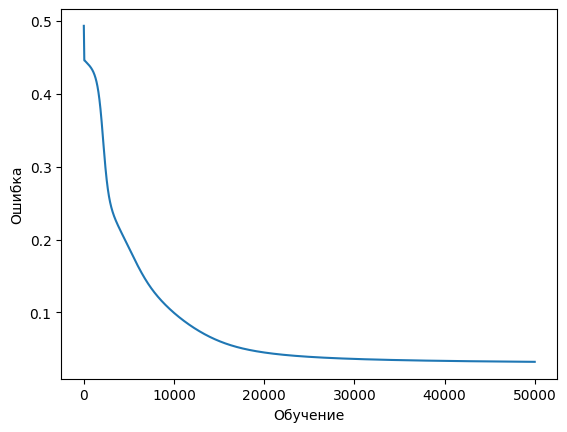

Точность нейронной сети 96.78%
CPU times: total: 1min
Wall time: 1min 3s


In [11]:
%%time
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов

#количество нейронов в скрытом слое
neuron_numb = 25
epoch_cnt = 50000

w0 = 2*np.random.random((4, neuron_numb)) - 1 # входной слой
w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # скрытый слой
w2 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # скрытый слой
w3 = 2*np.random.random((neuron_numb, 3)) - 1 # выходной слой

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(epoch_cnt): 

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))
    layer4 = sigmoid(np.dot(layer3, w3))

    # обратное распространение(back propagation) с использованием градиентного спуска 
    layer4_error = y_train - layer4
    layer4_delta = layer4_error * sigmoid_deriv(layer4)
    
    layer3_error = layer4_delta.dot(w3.T)
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)   
    
    w3 += layer3.T.dot(layer4_delta) * n
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer4_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

* Метрика медели улучшилась с 90.08% до 96.78%.
* Время обучения увеличилось с 14.1 s до 1min 3s 
* Увеличим количество эпох обучения до 100000

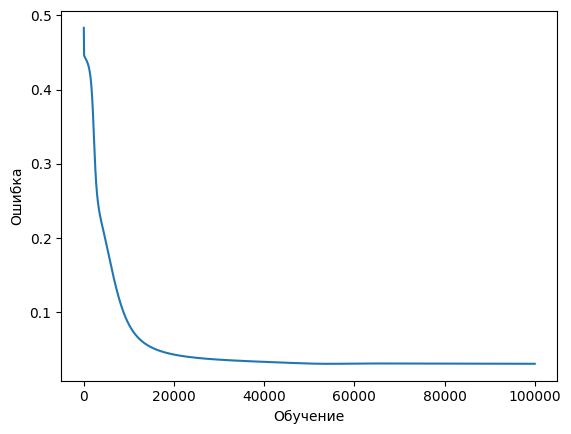

Точность нейронной сети 96.93%
CPU times: total: 2min 1s
Wall time: 2min 3s


In [15]:
%%time
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов

#количество нейронов в скрытом слое
neuron_numb = 25
epoch_cnt = 100000

w0 = 2*np.random.random((4, neuron_numb)) - 1 # входной слой
w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # скрытый слой
w2 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # скрытый слой
w3 = 2*np.random.random((neuron_numb, 3)) - 1 # выходной слой

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(epoch_cnt): 

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))
    layer4 = sigmoid(np.dot(layer3, w3))

    # обратное распространение(back propagation) с использованием градиентного спуска 
    layer4_error = y_train - layer4
    layer4_delta = layer4_error * sigmoid_deriv(layer4)
    
    layer3_error = layer4_delta.dot(w3.T)
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)   
    
    w3 += layer3.T.dot(layer4_delta) * n
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer4_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

* Метрика медели улучшилась с 96.78% до 96.93%
* Время обучения увеличилось с 1min 3s до 2min 3s

### Оценка модели на тестовых данных

In [16]:
%%time
# прямое распространение(feed forward)
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))
layer3 = sigmoid(np.dot(layer2, w2))
layer4 = sigmoid(np.dot(layer3, w3))

layer4_error = y_test - layer4
error = np.mean(np.abs(layer4_error))

accuracy = (1 - error) * 100

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 96.92%
CPU times: total: 0 ns
Wall time: 0 ns


Выводы:
* Удалось достичь приемлимых значений метрики для итоговой модели
* С увеличением количества нейронов, количества скрытых слоёв и количества эпох растёт точность модели с увеличением времени на обучение.